<a href="https://colab.research.google.com/github/ese-msc-2022/acds-moonshot-xenophanes/blob/olya/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Thu Feb  2 19:38:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    54W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%%bash
pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 


In [14]:
%cd /content/drive/MyDrive/crater_model/
%pwd

/content/drive/MyDrive/crater_model


'/content/drive/MyDrive/crater_model'

In [ ]:
%rm -Rf model
!git clone https://github.com/ultralytics/yolov5 model/

Cloning into 'model'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.08 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (10291/10291), done.


In [13]:
# copy data 
root_dir = '/content/drive/MyDrive/crater_model/'
moon_data_dir_small = '../moon_cropped/Moon_WAC_Training/416'
moon_data_dir_medium = '../moon_cropped/Moon_WAC_Training/2048'
moon_data_dir_large = '../moon_cropped/Moon_WAC_Training/4096'
mars_data_dir = '../data'
moon_dataset_dir_small = 'moon_dataset_small'
moon_dataset_dir_medium = 'moon_dataset_medium'
moon_dataset_dir_large = 'moon_dataset_large'
mars_dataset_dir = 'mars_dataset'

model_dir = 'model'

from data_manager import DataManager
from model_utils import MyModel
import os
from pathlib import Path

model = MyModel()


In [ ]:
%ls -la ../moon_cropped/Moon_WAC_Training/2048/images | wc -l
%ls -la ../moon_cropped/Moon_WAC_Training/2048/labels | wc -l

%rm -f ../moon_cropped/Moon_WAC_Training/2048/images/.DS_Store

%ls -la ../moon_cropped/Moon_WAC_Training/2048/images | wc -l
%ls -la ../moon_cropped/Moon_WAC_Training/2048/labels | wc -l

321
321
321
321


In [21]:
# copy data over for mars
mars_data = DataManager(root_dir=root_dir,data_dir=mars_data_dir,dataset_dir = mars_dataset_dir)
mars_data.construct_dataset_tree(delete=True,predictions='mars_inference')

# model sets
mars_data.split_for_model()
mars_data.convert_csv_to_txt()

len(train_images)=560 len(val_images)=168 len(test_images)=72
len(train_labels)=560 len(val_labels)=168 len(test_labels)=72
Copying: train_images
Copying: train_labels
Copying: val_images
Copying: val_labels
Copying: test_images
Copying: test_labels
Converting: /content/drive/MyDrive/crater_model/mars_dataset/labels/train csv to txt
Converting: /content/drive/MyDrive/crater_model/mars_dataset/labels/val csv to txt
Converting: /content/drive/MyDrive/crater_model/mars_dataset/labels/test csv to txt


0

/content/drive/MyDrive/crater_model/mars_dataset/images/train/margaritifersinus_35_11.png


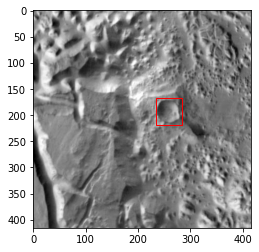

In [ ]:
img = os.listdir(os.path.join(mars_dataset_dir, 'images', 'train'))[10]
img = os.path.join(root_dir, mars_dataset_dir, 'images', 'train', img)
print(img)

model.plot_test_image(img)

In [ ]:
# copy data over for moons large
moon_data_small = DataManager(root_dir=root_dir,data_dir=moon_data_dir_small,dataset_dir = moon_dataset_dir_small)
moon_data_small.construct_dataset_tree(delete=True,predictions=False)

# model sets
#moon_data_medium.split_for_model(data_aug=True)
moon_data_small.split_for_model()
moon_data_small.convert_csv_to_txt()

len(train_images)=5938 len(val_images)=1781 len(test_images)=764
len(train_labels)=5938 len(val_labels)=1781 len(test_labels)=764
Copying: train_images
Copying: train_labels
Copying: val_images
Copying: val_labels
Copying: test_images
Copying: test_labels
Converting: /content/drive/MyDrive/crater_model/moon_dataset_small/labels/train csv to txt
Converting: /content/drive/MyDrive/crater_model/moon_dataset_small/labels/val csv to txt
Converting: /content/drive/MyDrive/crater_model/moon_dataset_small/labels/test csv to txt


0

moon_dataset_small
/content/drive/MyDrive/crater_model/moon_dataset_small/images/train/cell3146.png
['cell3146.png', 'cell2141.png', 'cell7887.png', 'cell3283.png', 'cell7503.png', 'cell7858.png', 'cell3854.png', 'cell5122.png', 'cell4708.png', 'cell1764.png', 'cell2692.png', 'cell1296.png', 'cell3205.png', 'cell7909.png', 'cell3901.png', 'cell8338.png', 'cell2328.png', 'cell551.png', 'cell3831.png', 'cell2868.png', 'cell7592.png', 'cell5330.png', 'cell5054.png', 'cell3327.png', 'cell3806.png', 'cell7420.png', 'cell8146.png', 'cell4013.png', 'cell1549.png', 'cell5465.png', 'cell4996.png', 'cell7180.png', 'cell6388.png', 'cell1786.png', 'cell7466.png', 'cell2712.png', 'cell4655.png', 'cell8261.png', 'cell706.png', 'cell8179.png', 'cell6025.png', 'cell7014.png', 'cell4045.png', 'cell705.png', 'cell2160.png', 'cell1754.png', 'cell3848.png', 'cell4435.png', 'cell2725.png', 'cell5115.png', 'cell4982.png', 'cell6615.png', 'cell6783.png', 'cell6744.png', 'cell2858.png', 'cell2180.png', 'cell1

OSError: ignored

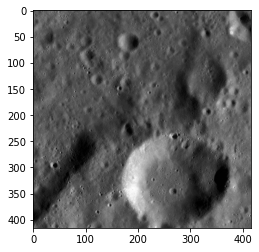

In [17]:
print(moon_dataset_dir_small)
img = os.listdir(os.path.join(moon_dataset_dir_small, 'images', 'train'))[0]#[32]
img = os.path.join(root_dir, moon_dataset_dir_small, 'images', 'train', img)
print(img)

print(os.listdir(os.path.join(moon_dataset_dir_small, 'images', 'train')))
#plot example test image with lable

model.plot_test_image(img)

In [5]:
# copy data over for moons medium
moon_data_medium = DataManager(root_dir=root_dir,data_dir=moon_data_dir_medium,dataset_dir = moon_dataset_dir_medium)
moon_data_medium.construct_dataset_tree(delete=True,predictions=False)

# model sets
moon_data_medium.split_for_model()
moon_data_medium.convert_csv_to_txt()

len(train_images)=224 len(val_images)=67 len(test_images)=29
len(train_labels)=224 len(val_labels)=67 len(test_labels)=29
Copying: train_images


KeyboardInterrupt: ignored

/content/drive/MyDrive/crater_model/moon_dataset_medium/images/train/cell131.png


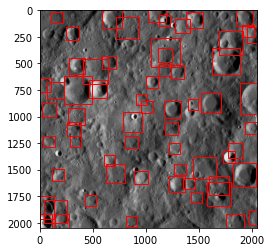

In [ ]:
img = os.listdir(os.path.join(moon_dataset_dir_medium, 'images', 'train'))[10]
img = os.path.join(root_dir, moon_dataset_dir_medium, 'images', 'train', img)
print(img)

#plot example test image with lable

model.plot_test_image(img)

In [ ]:
# copy data over for moons large
moon_data_large = DataManager(root_dir=root_dir,data_dir=moon_data_dir_large,dataset_dir = moon_dataset_dir_large)
moon_data_large.construct_dataset_tree(delete=True,predictions=False)

# model sets
#moon_data_medium.split_for_model(data_aug=True)
moon_data_large.split_for_model()
moon_data_large.convert_csv_to_txt()

len(train_images)=77 len(val_images)=23 len(test_images)=11
len(train_labels)=77 len(val_labels)=23 len(test_labels)=11
Copying: train_images
Copying: train_labels
Copying: val_images
Copying: val_labels
Copying: test_images
Copying: test_labels
Converting: /content/drive/MyDrive/crater_model/moon_dataset_large/labels/train csv to txt
Converting: /content/drive/MyDrive/crater_model/moon_dataset_large/labels/val csv to txt
Converting: /content/drive/MyDrive/crater_model/moon_dataset_large/labels/test csv to txt


0

In [ ]:
img = os.listdir(os.path.join(moon_dataset_dir_large, 'images', 'train'))[32]
img = os.path.join(root_dir, moon_dataset_dir_large, 'images', 'train', img)
print(img)

print(os.listdir(os.path.join(moon_dataset_dir_large, 'images', 'train')))
#plot example test image with lable

model.plot_test_image(img)

/content/drive/MyDrive/crater_model/moon_dataset_large/images/train/new37.png
['cell65.png', 'new70.png', 'cell47.png', 'new9.png', 'cell57.png', 'cell69.png', 'new52.png', 'cell73.png', 'new33.png', 'new58.png', 'new47.png', 'cell76.png', 'new48.png', 'new29.png', 'new5.png', 'cell53.png', 'cell67.png', 'new4.png', 'new62.png', 'cell17.png', 'new43.png', 'cell34.png', 'new59.png', 'cell78.png', 'new19.png', 'new13.png', 'new67.png', 'new2.png', 'cell56.png', 'new73.png', 'new11.png', 'cell54.png', 'new37.png', 'new69.png', 'new17.png', 'cell5.png', 'cell16.png', 'cell61.png', 'new8.png', 'new15.png', 'new51.png', 'cell28.png', 'new27.png', 'cell12.png', 'new66.png', 'new24.png', 'cell50.png', 'new28.png', 'new30.png', 'cell27.png', 'new71.png', 'cell32.png', 'new35.png', 'new61.png', 'cell33.png', 'cell6.png', 'cell59.png', 'cell30.png', 'new50.png', 'cell43.png', 'cell48.png', 'new18.png', 'cell55.png', 'cell21.png', 'new38.png', 'new42.png', 'cell13.png', 'cell4.png', 'new31.png', '

UnidentifiedImageError: ignored

In [ ]:
%pwd

'/content/drive/MyDrive/crater_model'

In [ ]:
##################################TRAINING#########################################

In [ ]:
# training mars model 
model_v = 'yolov5m.yaml'
hyp = 'hyp.scratch-low.yaml'
batch,epochs,workers = 32,30,24
data = 'mars.yaml'
weights = 'yolov5m.pt'
name = f'mars_yolo5m_scratch-low_{batch}_{epochs}'
!python '{model_dir}/train.py' --img 416 \
                            --data '{data}'\
                            --cfg '{model_v}'\
                            --hyp '{hyp}'\
                            --weights '{weights}'\
                            --name '{name}'\
                            --batch '{batch}'\
                            --epochs '{epochs}'\
                            --workers '{workers}'

train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=mars.yaml, hyp=hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=model/runs/train, name=mars_yolo5m_scratch-low_32_30, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv

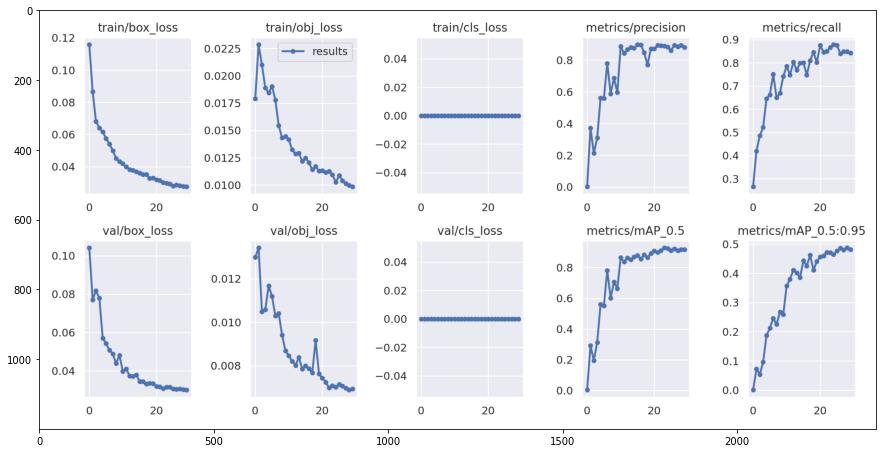

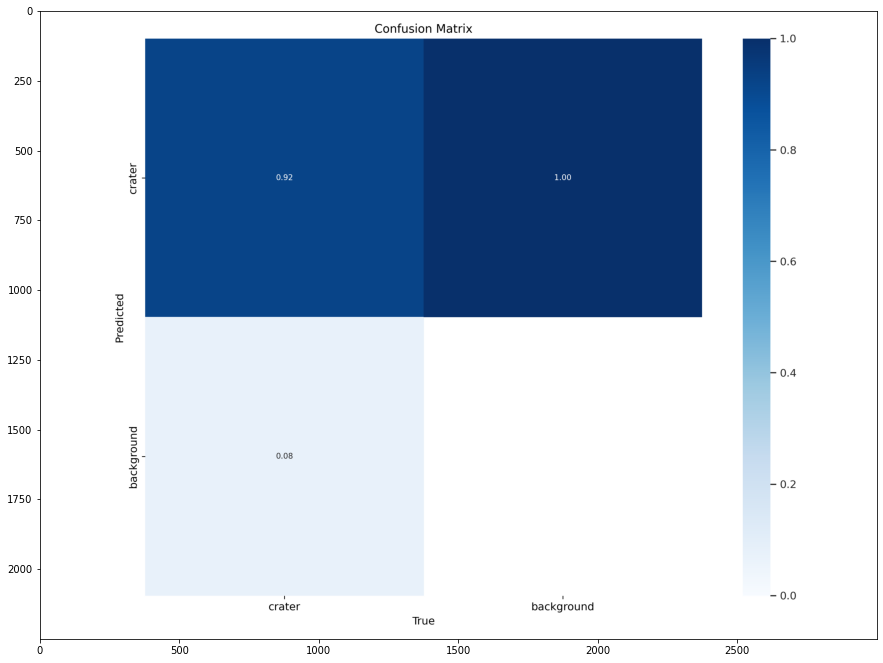

In [ ]:
# visualise model findings and assess the performans

paths = sorted(Path('model/runs/train').iterdir(), key=os.path.getmtime)
latest = paths[-1]
print(latest)
model.plot_train_metircs(latest)


In [ ]:
# training moons small model 
model_dir = 'model'
model_v = 'yolov5m.yaml'
hyp = 'hyp.scratch-low.yaml'
batch,epochs,workers = 32,30,24
data = 'moon_small.yaml'
weights = 'yolov5m.pt'
name = f'moon_small_yolo5m_scratch-low_{batch}_{epochs}'
!python '{model_dir}/train.py' --img 416 \
                            --data '{data}'\
                            --cfg '{model_v}'\
                            --hyp '{hyp}'\
                            --weights '{weights}'\
                            --name '{name}'\
                            --batch '{batch}'\
                            --epochs '{epochs}'\
                            --workers '{workers}'

train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=moon_small.yaml, hyp=hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=model/runs/train, name=moon_small_yolo5m_scratch-low_32_30, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hs

In [ ]:
# visualise model findings and assess the performans

paths = sorted(Path('model/runs/train').iterdir(), key=os.path.getmtime)
latest = paths[-1]
print(latest)
model.plot_train_metircs(latest)

In [ ]:
# training moons medium model 
model_dir = 'model'
model_v = 'yolov5m.yaml'
hyp = 'hyp.scratch-low.yaml'
batch,epochs,workers = 32,30,24
data = 'moon_medium.yaml'
weights = 'yolov5m.pt'
name = f'moon_medium_yolo5m_scratch-low_32_30'
!python '{model_dir}/train.py' --img 416 \
                            --data '{data}'\
                            --cfg '{model_v}'\
                            --hyp '{hyp}'\
                            --weights '{weights}'\
                            --name '{name}'\
                            --batch '{batch}'\
                            --epochs '{epochs}'\
                            --workers '{workers}'

train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=moon_medium.yaml, hyp=hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=model/runs/train, name=moon_medium_yolo5m_scratch-low_32_30, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

In [ ]:
# visualise model findings and assess the performans

paths = sorted(Path('model/runs/train').iterdir(), key=os.path.getmtime)
latest = paths[-1]
print(latest)
model.plot_train_metircs(latest)

In [ ]:
# training moons medium model 
model_dir = 'model'
model_v = 'yolov5m.yaml'
hyp = 'hyp.scratch-low.yaml'
batch,epochs,workers = 32,30,24
data = 'moon_medium.yaml'
weights = 'yolov5m.pt'
name = f'moon_medium_yolo5m_scratch-low_32_30'
!python '{model_dir}/train.py' --img 416 \
                            --data '{data}'\
                            --cfg '{model_v}'\
                            --hyp '{hyp}'\
                            --weights '{weights}'\
                            --name '{name}'\
                            --batch '{batch}'\
                            --epochs '{epochs}'\
                            --workers '{workers}'

In [ ]:
# visualise model findings and assess the performans

paths = sorted(Path('model/runs/train').iterdir(), key=os.path.getmtime)
latest = paths[-1]
print(latest)
model.plot_train_metircs(latest)

In [ ]:
#make predictions
#find our best pt file
latest = 'model/runs/train/mars_yolo5m_scratch-low_32_30'
print(latest)
imgs = os.path.join(moon_dataset_dir_medium, 'images', 'test')
pt = os.path.join(latest, 'weights', 'best.pt')
print(imgs,pt)
img_size,conf = 416,0.4

model = MyModel(model_dir=model_dir)
model.predict(best_w=pt, img_size=img_size, conf=conf, dir_predictions=imgs)

#!python 'model/detect.py' --weights '{pt}' \
#--img 416 --conf 0.4 --source '{imgs}' --save-txt --save-conf


model/runs/train/mars_yolo5m_scratch-low_32_30
moon_dataset_medium/images/test model/runs/train/mars_yolo5m_scratch-low_32_30/weights/best.pt
python model/detect.py --weights model/runs/train/mars_yolo5m_scratch-low_32_30/weights/best.pt --img 416 --conf 0.4 --source moon_dataset_medium/images/test --save-txt --save-conf


0

model/runs/train/moon_medium_yolo5m_scratch-low_32_30


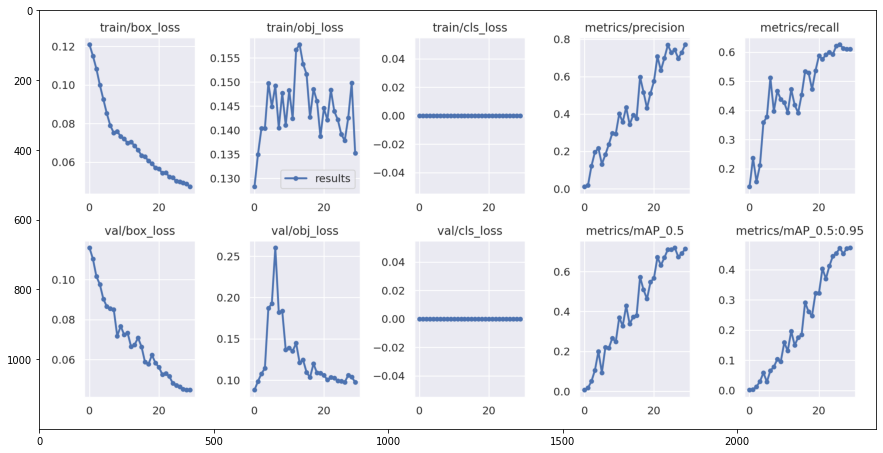

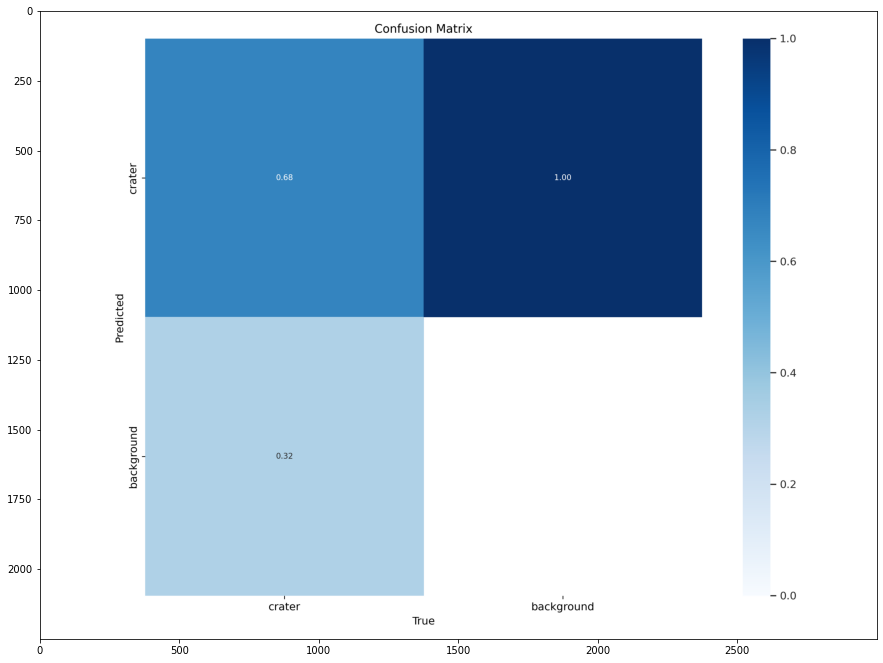

In [ ]:
# visualise model findings and assess the performans
paths = sorted(Path('model/runs/train').iterdir(), key=os.path.getmtime)
latest = paths[-1]
print(latest)
model.plot_train_metircs(latest)

In [20]:
#visualise predictions


# get coordinates for the predictions
imgs = 'inference'
planet = 'mars'
model = MyModel(model_dir=model_dir)
model.get_predicted_labels_for_images(imgs, planet, output='tmp')


python model/detect.py --weights weights/mars_best.pt --img 416 --conf 0.4 --source inference --save-txt --save-conf


AttributeError: ignored

In [ ]:

# get coordinates for the predictions
imgs = 'inference/small_400'
planet = 'moon'
model = MyModel(model_dir=model_dir)
model.get_predicted_labels_for_images(imgs, planet, output=False)